<a href="https://colab.research.google.com/github/Shayan-1947/ML-projects/blob/main/Restaurant_Visit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Importing Dataset
df=pd.read_csv(r"/content/Cuisine_rating.csv")

In [ ]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [ ]:
df.rename(columns={'Often A S':'Often Visited'},inplace=True)

In [ ]:
df.tail()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often Visited
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No
199,200,140,"Upper East Side,NY",Male,2005,Married,Student,4,French,Never,Never,3,2,2.5,No


In [ ]:
df.shape

(200, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often Visited   200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [ ]:
df.describe()

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df.isnull().sum()#hence there are no null values

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often Visited     0
dtype: int64

In [ ]:
df.duplicated().sum()#There are no duplicate values

0

In [ ]:
num=df.select_dtypes(exclude=object)

In [ ]:
num

,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
0,1,153,2006,3,5,4,4.5
1,2,123,1991,3,1,1,1.0
2,3,122,1977,5,5,5,5.0
3,4,153,1956,5,3,1,2.0
4,5,129,1997,4,2,4,3.0
...,...,...,...,...,...,...,...
195,196,175,1982,4,1,2,1.5
196,197,170,2000,4,1,2,1.5
197,198,160,2006,5,5,2,3.5
198,199,130,2002,3,3,2,2.5


In [ ]:
#Checking Outliers
def Find_Outliers(df):
    outliers = []
    for i in df.select_dtypes(include='number').columns:#can also use "for i in num: "
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        IQR = q3 - q1
        l1 = q1 - (IQR * 1.5)
        l2 = q3 + (IQR * 1.5)
        l3 = df[i] <= l1
        l4 = df[i] >= l2
        outliers_indices = ((df[i] < l1) | (df[i] > l2))
        outliers.extend(df[i][outliers_indices].index)
    return list(set(outliers))

outliers = Find_Outliers(df)
print('number of outliers: ' + str(len(outliers)))
print('max outlier value: ' + str(df.iloc[outliers].max().max()))
print('min outlier value: ' + str(df.iloc[outliers].min().min()))

number of outliers: 0
max outlier value: nan
min outlier value: nan


In [ ]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often Visited
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [ ]:
df.tail()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often Visited
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No
199,200,140,"Upper East Side,NY",Male,2005,Married,Student,4,French,Never,Never,3,2,2.5,No


In [ ]:
#number of males and females that are either Divorced,Married or Single
gender_martial_activity=df.groupby(["Gender","Marital Status"])["Activity"].count()
gender_martial_activity

Gender  Marital Status
Female  Divorced           6
        Married           36
        Single            40
Male    Divorced           8
        Married           50
        Single            60
Name: Activity, dtype: int64

In [ ]:
# calculate the sum of the "Budget" values for each cuisine.
budget_cuisine=df.groupby(["Cuisines"])['Budget'].sum()
budget_cuisine

Cuisines
Chinese      98
Filipino    126
French      134
Indian      109
Italian      70
Japanese    148
Seafood      78
Name: Budget, dtype: int64

In [ ]:
activity_cuisine=df.groupby(["Activity","Cuisines"])["User ID"].count()
activity_cuisine

Activity      Cuisines
Professional  Chinese      8
              Filipino    14
              French      16
              Indian      18
              Italian      6
              Japanese    12
              Seafood      6
Student       Chinese     16
              Filipino    20
              French      18
              Indian      14
              Italian     12
              Japanese    24
              Seafood     16
Name: User ID, dtype: int64

In [ ]:
#Drinking ratio by gender
drink_ratio=df.groupby(["Alcohol ","Gender"])["User ID"].count()
drink_ratio


Alcohol   Gender
Never     Female    40
          Male      48
Often     Female    25
          Male      36
Socially  Female    17
          Male      34
Name: User ID, dtype: int64

In [ ]:
#Smoking ratio by gender
smoker_ratio=df.groupby(["Smoker","Gender"])["User ID"].count()
smoker_ratio

Smoker    Gender
Never     Female    20
          Male      39
Often     Female    28
          Male      42
Socially  Female    34
          Male      37
Name: User ID, dtype: int64

In [ ]:
#food Rating of each cuisune
cuisine_food_rating=df.groupby(["Cuisines"])['Food Rating'].sum()
cuisine_food_rating

Cuisines
Chinese      83
Filipino     92
French      112
Indian       89
Italian      58
Japanese    139
Seafood      71
Name: Food Rating, dtype: int64

In [ ]:
df.corr()['Overall Rating']


<ipython-input-93-03049bbe118a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Overall Rating']


User ID           0.076208
Area code        -0.008142
YOB               0.057508
Budget           -0.058049
Food Rating       0.709562
Service Rating    0.758532
Overall Rating    1.000000
Name: Overall Rating, dtype: float64

<ipython-input-94-4be049c20478>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  sns.barplot(y=df[y_axis],x=df[x_axis],ci=0,saturation=5.5)


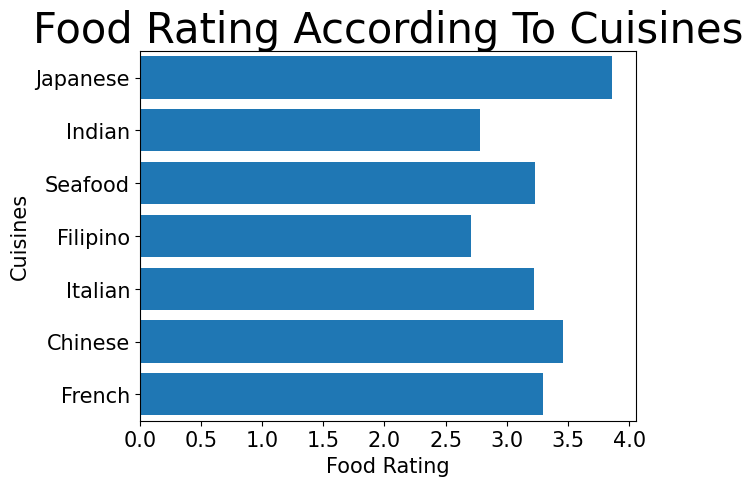

In [ ]:
def plot_bar(df,x_axis,y_axis):
  sns.barplot(y=df[y_axis],x=df[x_axis],ci=0,saturation=5.5)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.xlabel(x_axis,fontsize=15)
  plt.ylabel(y_axis,fontsize=15)
  plt.title("Food Rating According To Cuisines",fontsize = 30)
plot_bar(df,'Food Rating','Cuisines')

In [ ]:
#from above figure its clear that japanese food have maximum food rating whereas filipino food has minimum food rating

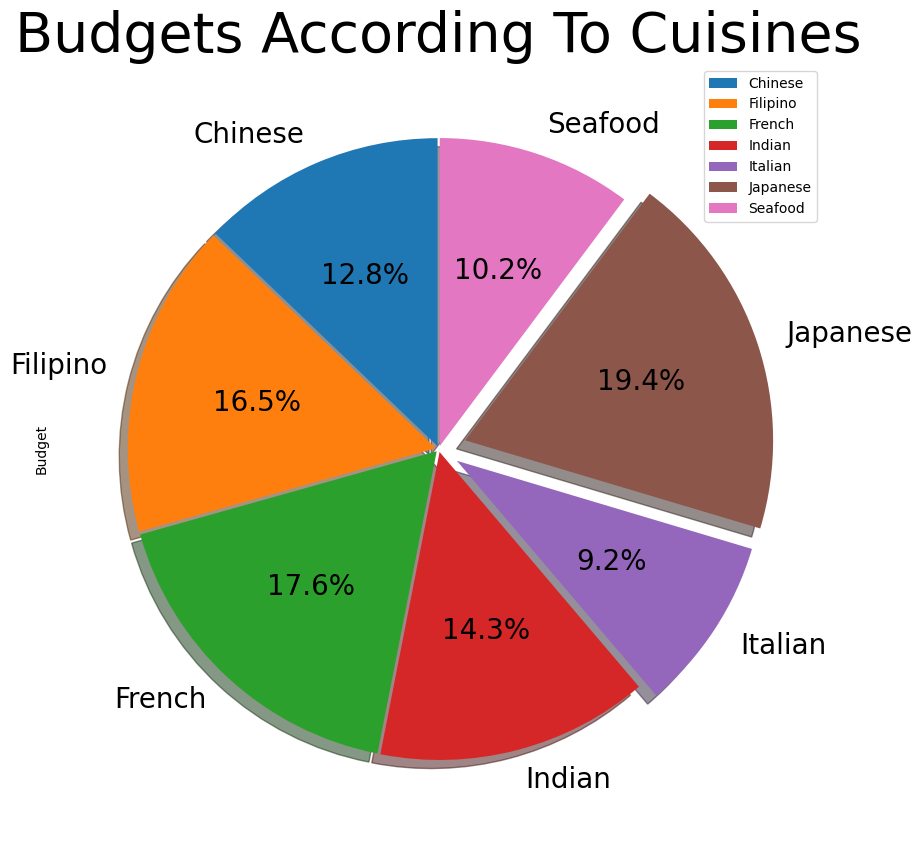

In [ ]:
def pie_chart(df,x_axis):
  fig = plt.figure(figsize=(20,10))
  budget_cuisine.plot(kind='pie',rot=90,explode=(0.01,0.01,0.01,0.01,0.07,0.09,0.01),startangle = 90,shadow = True,autopct='%1.1f%%', textprops={'fontsize': 20})
  plt.legend()
  plt.title("Budgets According To Cuisines",fontsize = 40)

pie_chart(df,'budget_cuisine')


In [ ]:
# above pie chart shows that Japneses food is most expensive and Italian is least

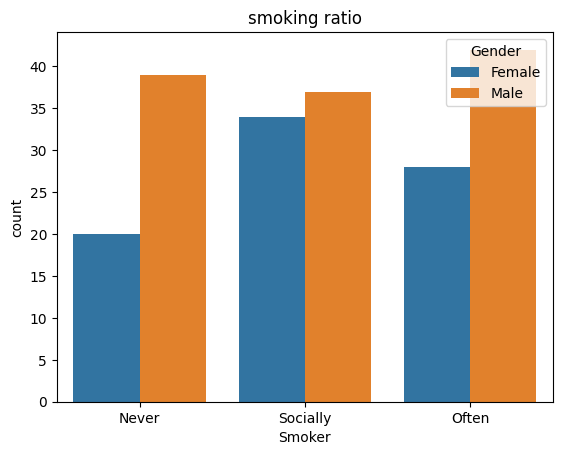

In [ ]:
sns.countplot(x='Smoker', hue='Gender', data=df)
plt.title('smoking ratio')
plt.show()

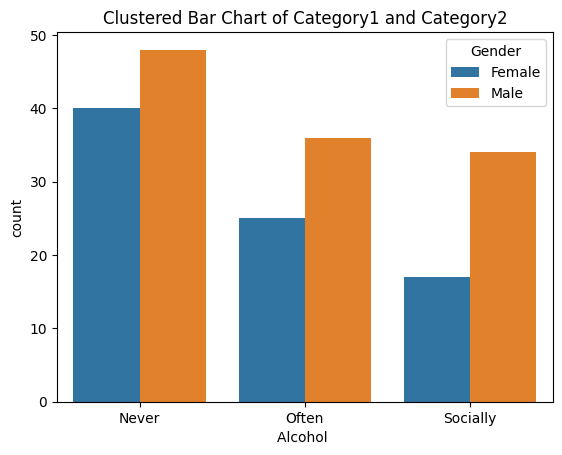

In [ ]:
sns.countplot(x='Alcohol ', hue='Gender', data=df)
plt.title('Clustered Bar Chart of Category1 and Category2')
plt.show()

<Axes: xlabel='Activity', ylabel='count'>

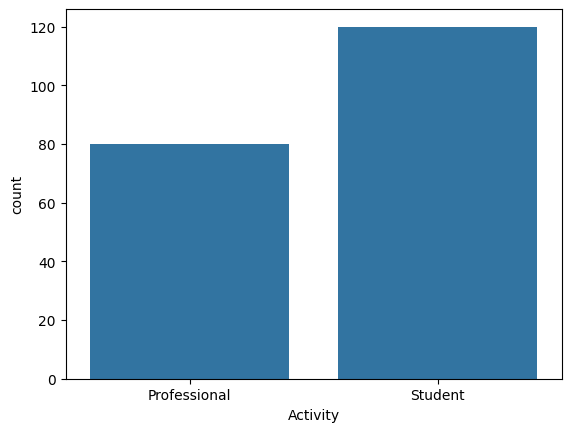

In [ ]:
sns.countplot(x="Activity",data=df)



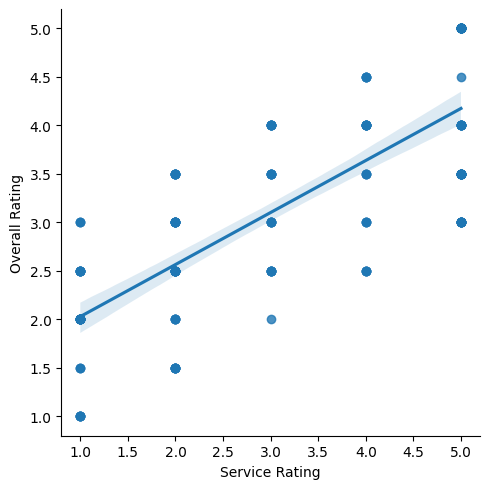

In [ ]:
sns.lmplot(x="Service Rating",y="Overall Rating",data=df)#scatter plot with linear regression

<ipython-input-102-29e004161f27>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-102-29e004161f27>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,  annot_kws={'size': 15})


Text(0.5, 1.0, 'Correlation plot')

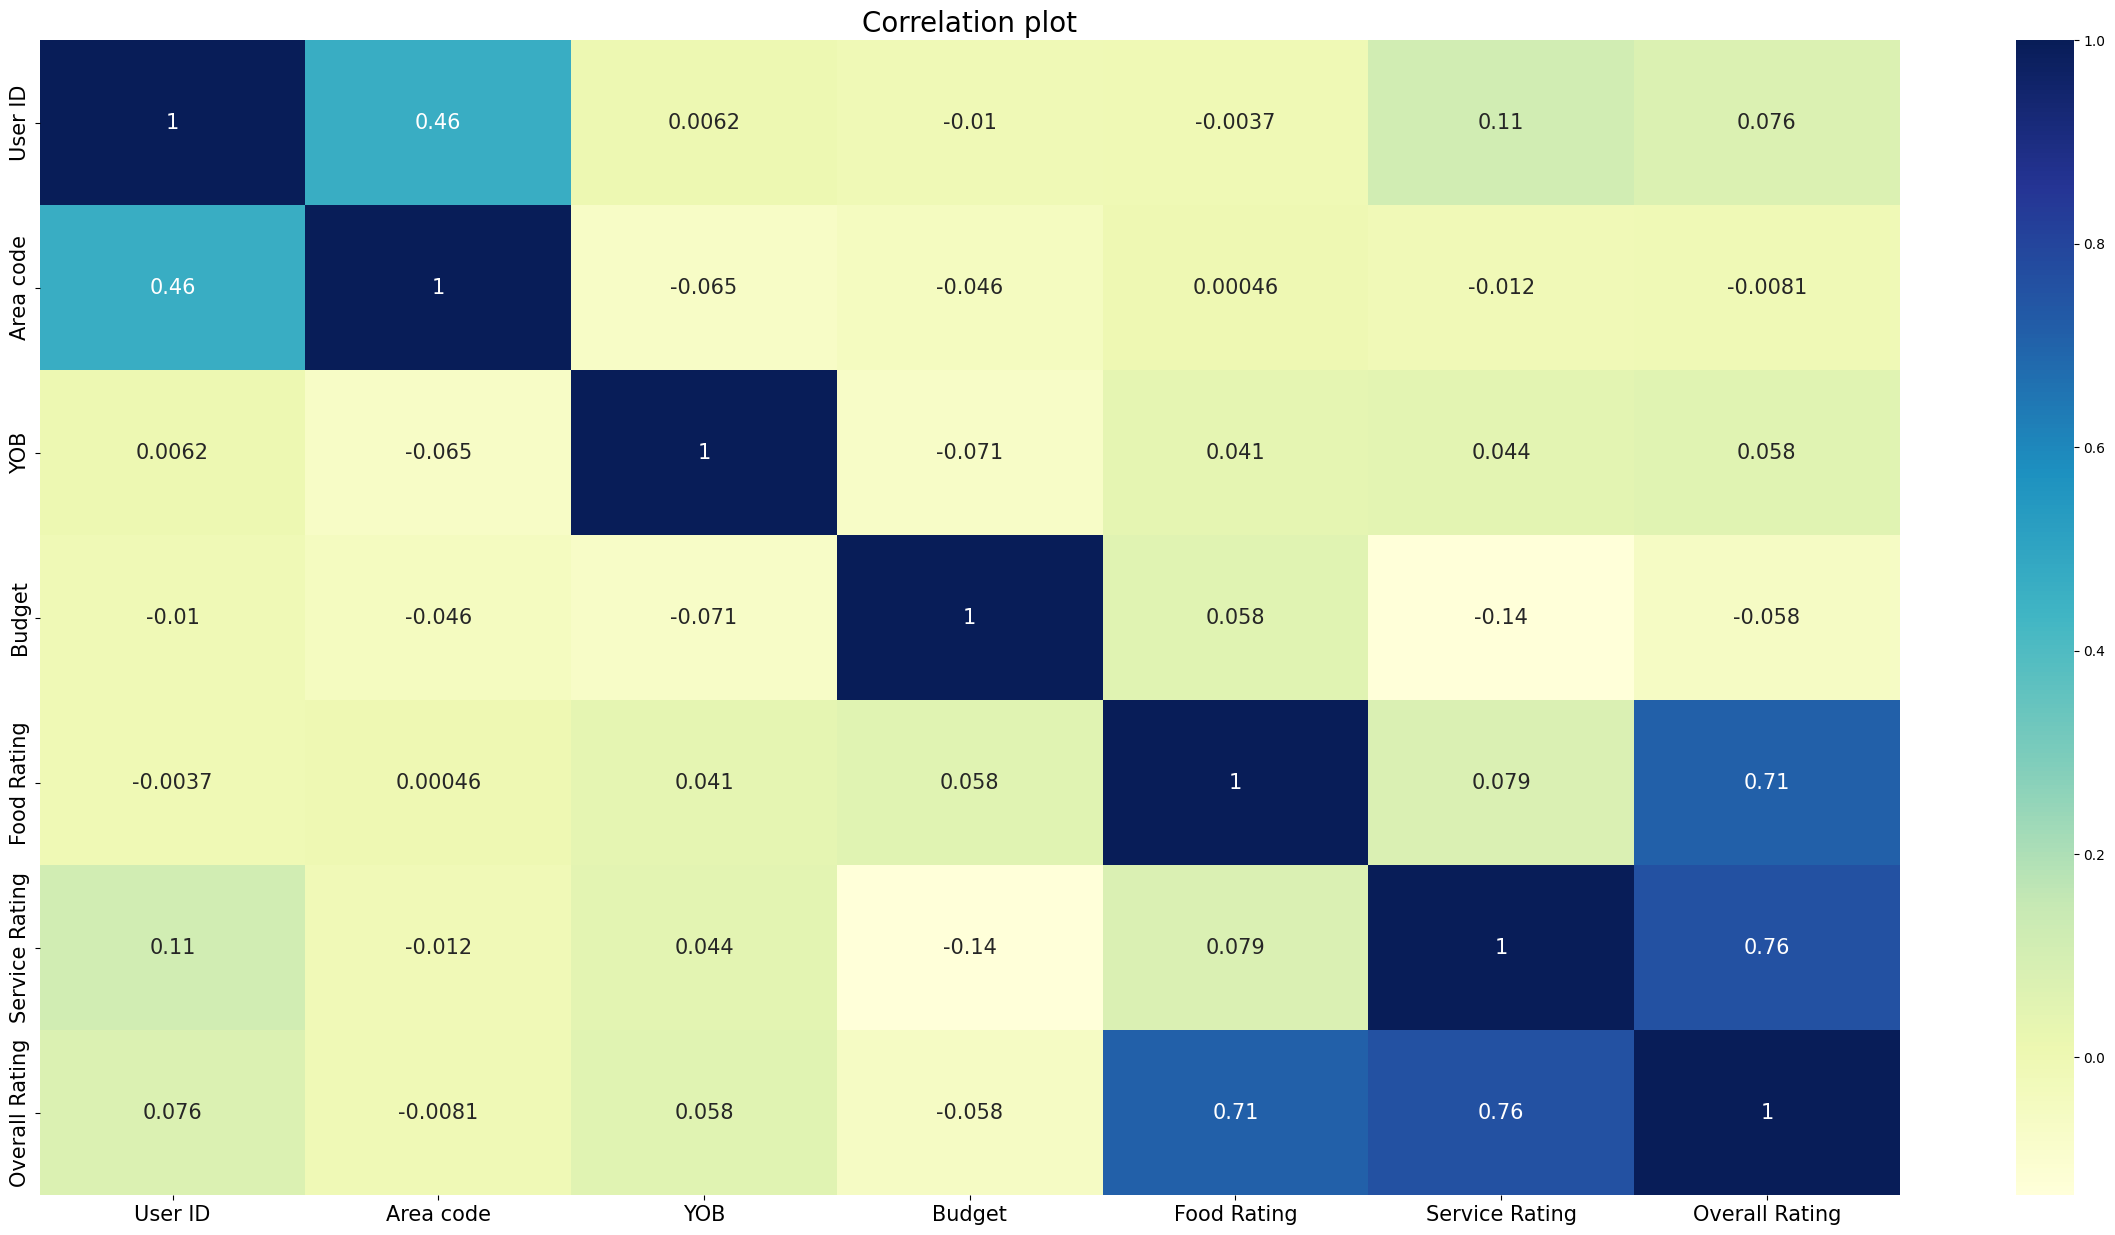

In [ ]:
fig = plt.figure(figsize=(30,15))
df.corr()
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,  annot_kws={'size': 15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Correlation plot",fontsize = 20)


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()



In [ ]:
df['Location']= le.fit_transform(df['Location'])
df['Gender']= le.fit_transform(df['Gender'])
df['Marital Status']= le.fit_transform(df['Marital Status'])
df['Activity']= le.fit_transform(df['Activity'])
df['Cuisines']= le.fit_transform(df['Cuisines'])
df['Alcohol ']= le.fit_transform(df['Alcohol '])
df['Smoker']= le.fit_transform(df['Smoker'])
df['Often Visited']=le.fit_transform(df['Often Visited'])


In [ ]:
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often Visited
0,1,153,8,0,2006,2,0,3,5,0,0,5,4,4.5,0
1,2,123,7,0,1991,1,1,3,3,0,2,1,1,1.0,0
2,3,122,9,1,1977,2,1,5,6,1,1,5,5,5.0,1
3,4,153,8,0,1956,1,0,5,5,0,2,3,1,2.0,0
4,5,129,1,1,1997,2,1,4,1,2,0,2,4,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,7,0,1982,2,0,4,2,0,2,1,2,1.5,0
196,197,170,9,0,2000,1,1,4,0,0,1,1,2,1.5,0
197,198,160,7,0,2006,2,0,5,5,0,1,5,2,3.5,0
198,199,130,7,1,2002,1,1,3,1,0,2,3,2,2.5,0


In [ ]:
X = df.drop(columns=["Often Visited"],axis=1)
y = df["Often Visited"]

In [ ]:
X

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating
0,1,153,8,0,2006,2,0,3,5,0,0,5,4,4.5
1,2,123,7,0,1991,1,1,3,3,0,2,1,1,1.0
2,3,122,9,1,1977,2,1,5,6,1,1,5,5,5.0
3,4,153,8,0,1956,1,0,5,5,0,2,3,1,2.0
4,5,129,1,1,1997,2,1,4,1,2,0,2,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,7,0,1982,2,0,4,2,0,2,1,2,1.5
196,197,170,9,0,2000,1,1,4,0,0,1,1,2,1.5
197,198,160,7,0,2006,2,0,5,5,0,1,5,2,3.5
198,199,130,7,1,2002,1,1,3,1,0,2,3,2,2.5


In [ ]:
y

0      0
1      0
2      1
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Name: Often Visited, Length: 200, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)


LR_accuracy=lr_model.score(X_test,y_test)

print("mean_absolute_error:",round(mse_1,3))
print("root_mean_squared_error:",round(rmse_1,3))
print("lr_accuracy :",LR_accuracy)



mean_absolute_error: 0.175
root_mean_squared_error: 0.418
lr_accuracy : 0.825


In [ ]:
from sklearn.svm import SVC
SVC_model = SVC(kernel= 'rbf')
SVC_model.fit(X_train,y_train)
y_pred = SVC_model.predict(X_test)


SVC_accuracy=SVC_model.score(X_test,y_test)
print("SVC_accuracy :",SVC_accuracy)




mean_absolute_error: 0.1
root_mean_squared_error: 0.316
SVC_accuracy : 0.9


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train,y_train)
y_pred=DT_model.predict(X_test)


DT_accuracy=DT_model.score(X_test,y_test)
print("DT_accuracy :",DT_accuracy)




mean_absolute_error: 0.0
root_mean_squared_error: 0.0
DT_accuracy : 1.0


In [ ]:
df_1 = pd.DataFrame({"models_names":["LogisticRegresssion",
                                   "SVC","DecisionTreeClasifier"
                                     ],
                   "Accuracy_score":[LR_accuracy,SVC_accuracy,DT_accuracy]})

df_1.sort_values(by="Accuracy_score",ascending=True)

,models_names,mean_squared_error,root_mean_squared_error,Accuracy_score
0,LogisticRegresssion,0.175,0.418330,0.825
1,SVC,0.100,0.316228,0.900
2,DecisionTreeClasifier,0.000,0.000000,1.000


In [ ]:
DT_model.predict([[1,200,6,0,2008,2,0,3,4,0,0,3,4,4]])

array([1])